# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Load-libraries" data-toc-modified-id="Load-libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load libraries</a></div><div class="lev1 toc-item"><a href="#Look-at-few-random-images" data-toc-modified-id="Look-at-few-random-images-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Look at few random images</a></div><div class="lev1 toc-item"><a href="#Worst-10" data-toc-modified-id="Worst-10-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Worst 10</a></div><div class="lev2 toc-item"><a href="#Load-previously-trained-model" data-toc-modified-id="Load-previously-trained-model-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Load previously trained model</a></div><div class="lev2 toc-item"><a href="#Generate-predictions" data-toc-modified-id="Generate-predictions-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Generate predictions</a></div><div class="lev2 toc-item"><a href="#Worst-10" data-toc-modified-id="Worst-10-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Worst 10</a></div>

# Load libraries

In [1]:
import cv2
import numpy as np
import pandas as pd

from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard
from keras.models import Model
from keras.layers import Input, concatenate, Conv2D, MaxPooling2D, Activation, UpSampling2D, BatchNormalization
from keras.optimizers import RMSprop
from keras.losses import binary_crossentropy
import keras.backend as K

from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from os import listdir
ids_list = [x.split('.')[0] for x in listdir('data/train')]

# Look at few random images

In [4]:
def plot_img_mask(img, mask, is_filepath = True):
    if is_filepath:
        img = cv2.imread(img)
        mask = cv2.imread(mask, cv2.IMREAD_GRAYSCALE)
    
    img_masked = cv2.bitwise_and(img, img, mask=mask)
    
    plt.figure(figsize=(20, 20))
    plt.subplot(1,3,1)
    plt.imshow(img)
    plt.subplot(1,3,2)
    plt.imshow(mask)
    plt.subplot(1,3,3)
    plt.imshow(img_masked)
    plt.show()

In [5]:
import random

In [6]:
def plot_random_img():
    random_id = random.choice(ids_list)
    plot_img_mask('data/train/' + random_id + '.jpg', 'data/train_masks/' + random_id + '_mask.png')

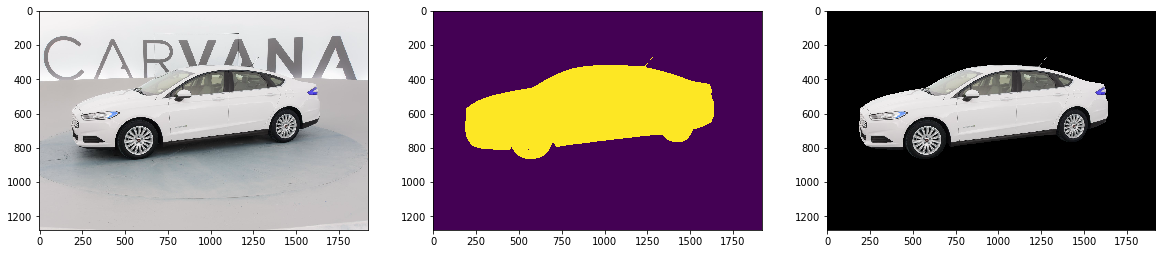

In [7]:
plot_random_img()

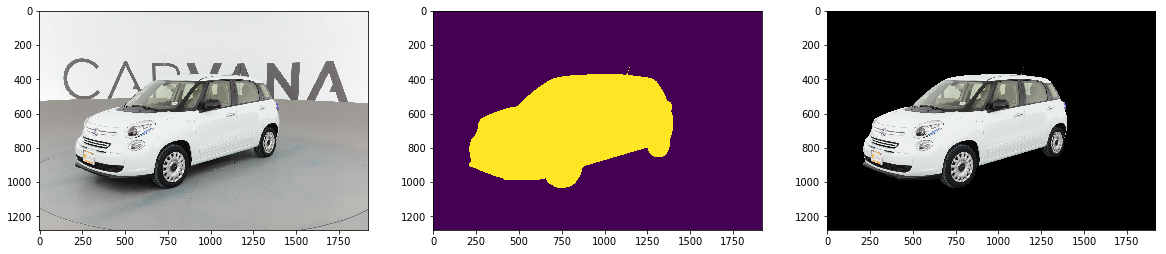

In [8]:
plot_random_img()

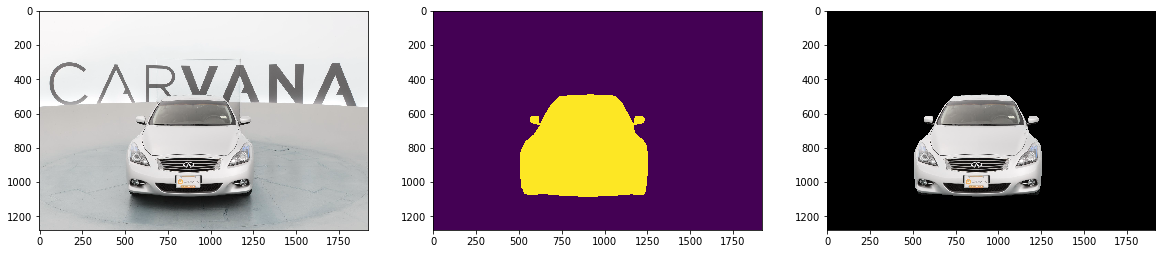

In [9]:
plot_random_img()

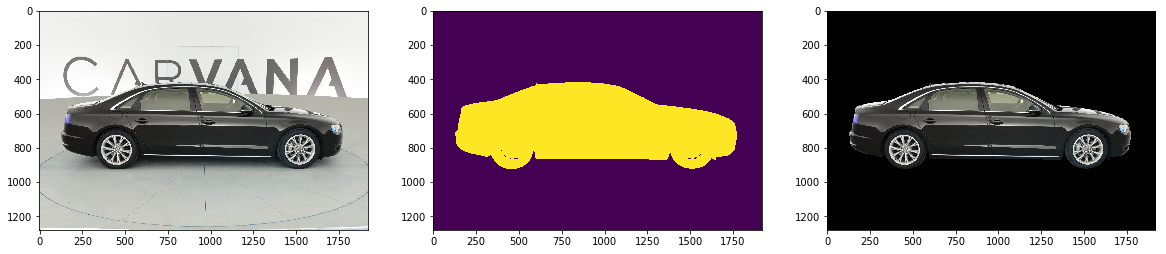

In [10]:
plot_random_img()

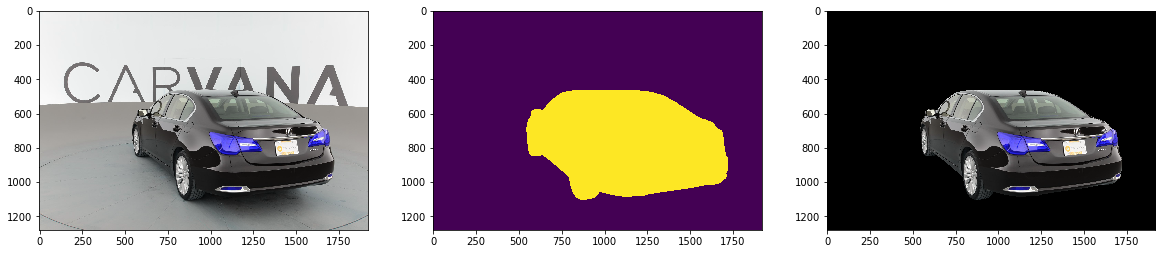

In [11]:
plot_random_img()

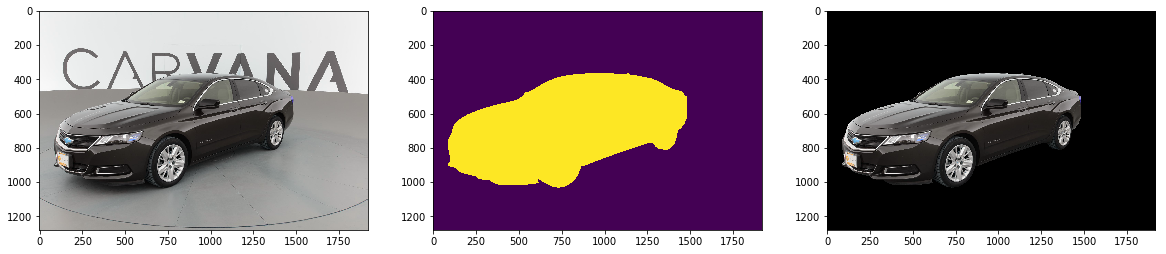

In [12]:
plot_random_img()

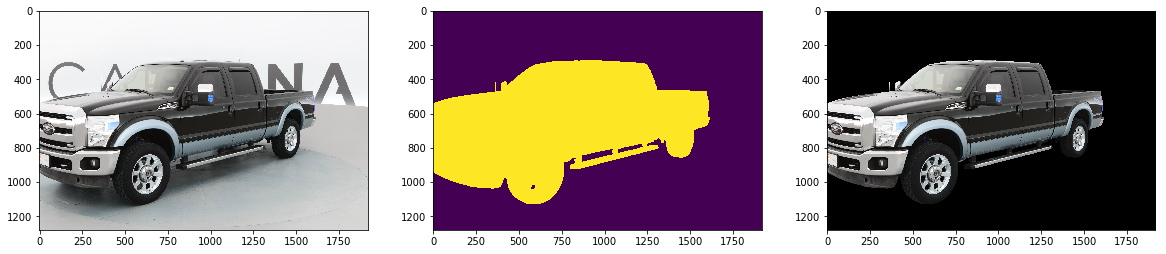

In [13]:
plot_random_img()

# Look at few random images of the same angle

In [14]:
import re

In [15]:
def plot_random_img_angle(angle = r'_01$'):
    random_id = random.choice(list(filter(lambda x: re.search(angle, x), ids_list)))
    plot_img_mask('data/train/' + random_id + '.jpg', 'data/train_masks/' + random_id + '_mask.png')

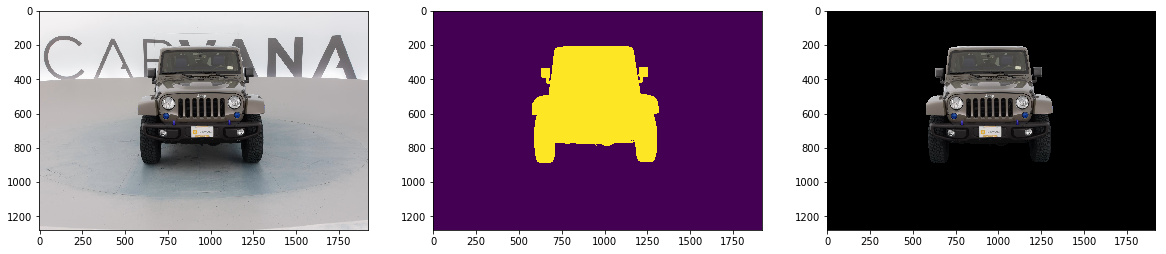

In [16]:
plot_random_img_angle()

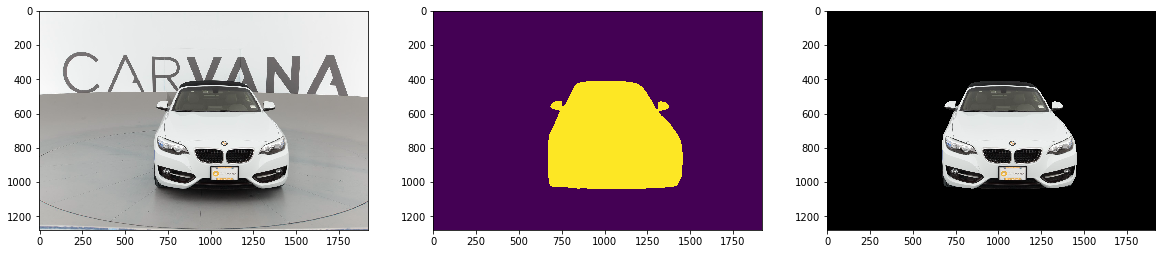

In [17]:
plot_random_img_angle()

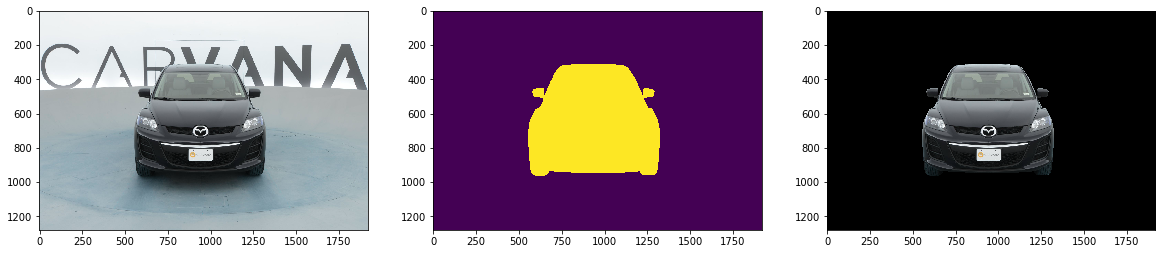

In [18]:
plot_random_img_angle()

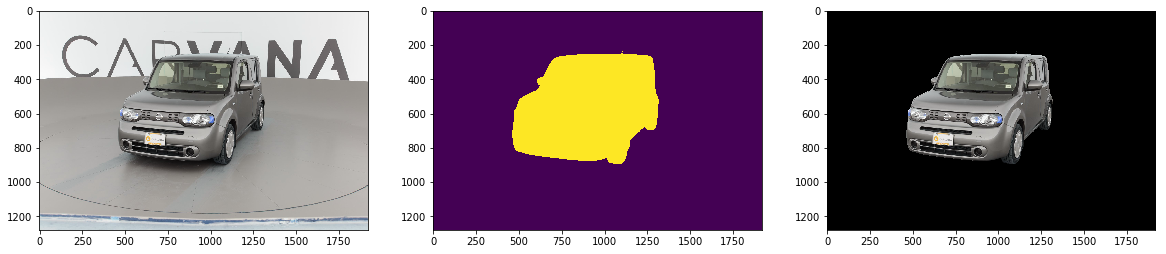

In [19]:
plot_random_img_angle(r'02$')

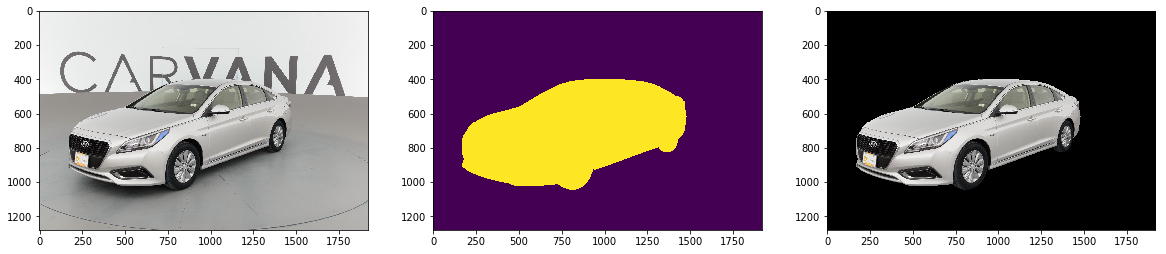

In [20]:
plot_random_img_angle(r'03$')

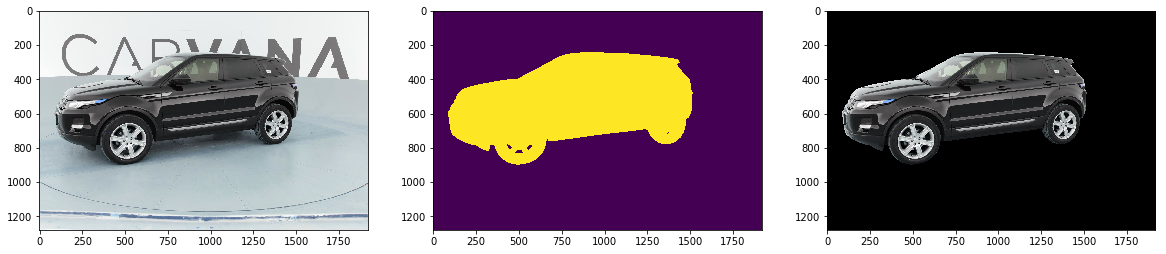

In [21]:
plot_random_img_angle(r'04$')

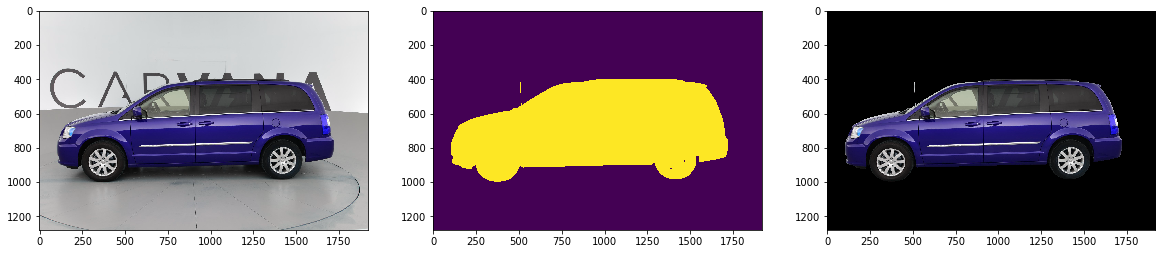

In [22]:
plot_random_img_angle(r'05$')

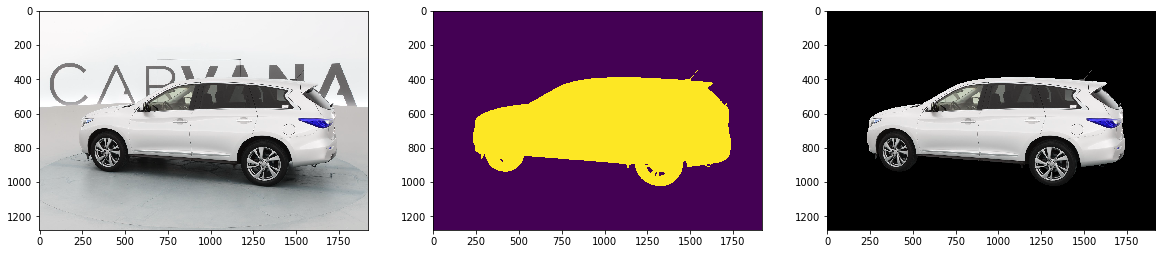

In [23]:
plot_random_img_angle(r'06$')

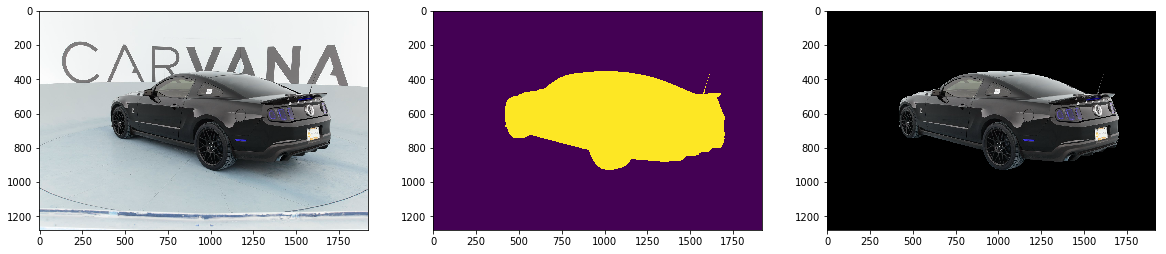

In [24]:
plot_random_img_angle(r'07$')

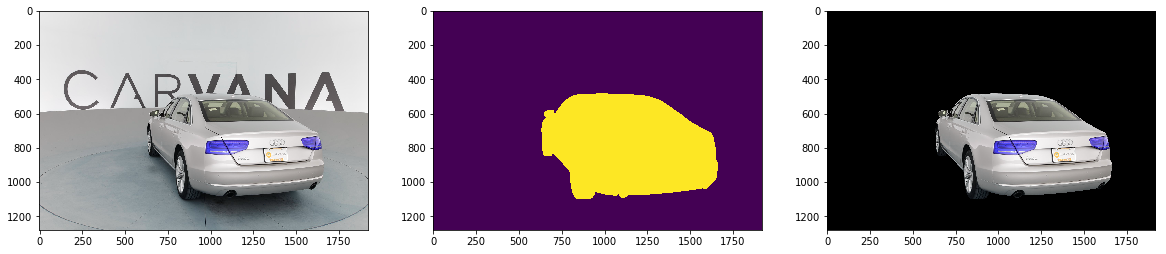

In [25]:
plot_random_img_angle(r'08$')

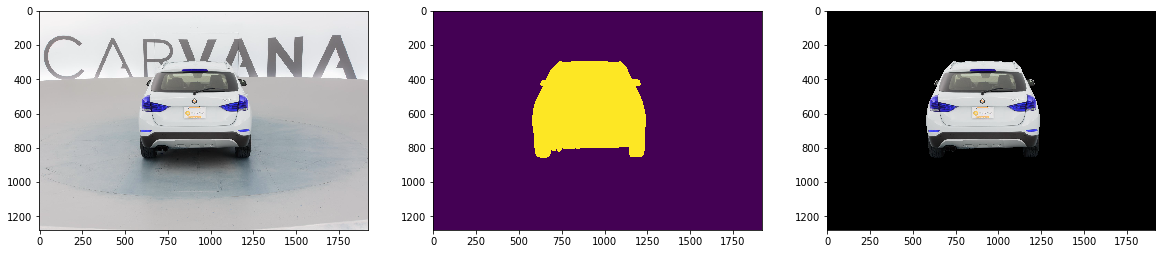

In [26]:
plot_random_img_angle(r'09$')

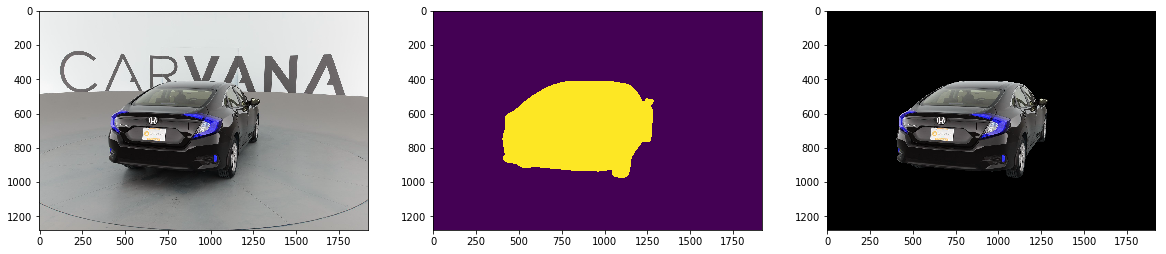

In [27]:
plot_random_img_angle(r'10$')

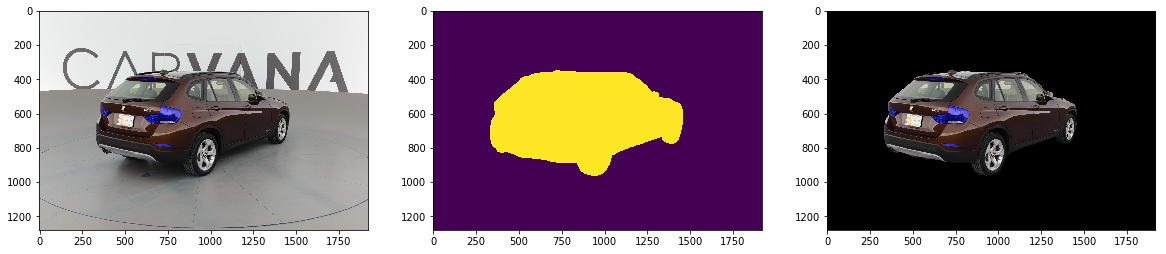

In [28]:
plot_random_img_angle(r'11$')

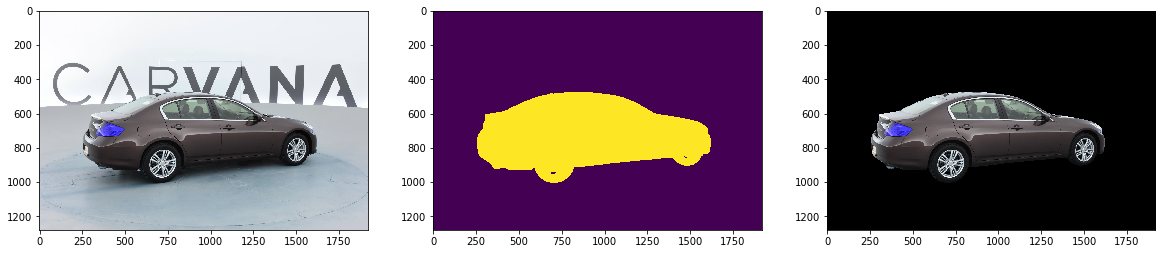

In [29]:
plot_random_img_angle(r'12$')

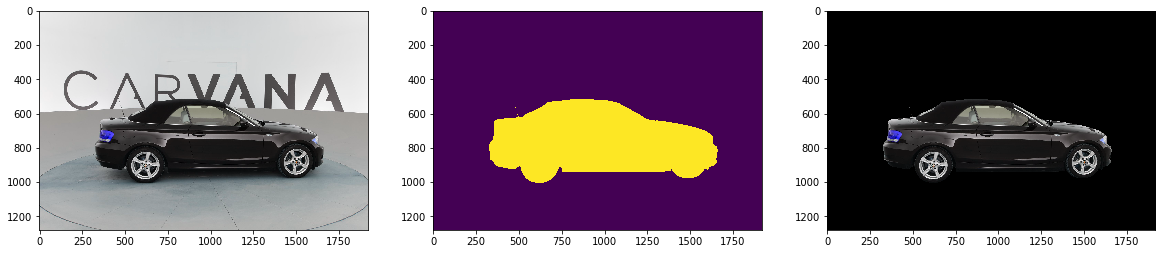

In [30]:
plot_random_img_angle(r'13$')

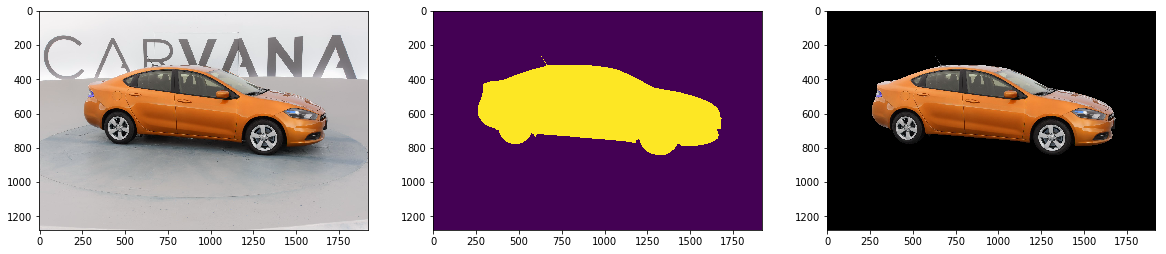

In [31]:
plot_random_img_angle(r'14$')

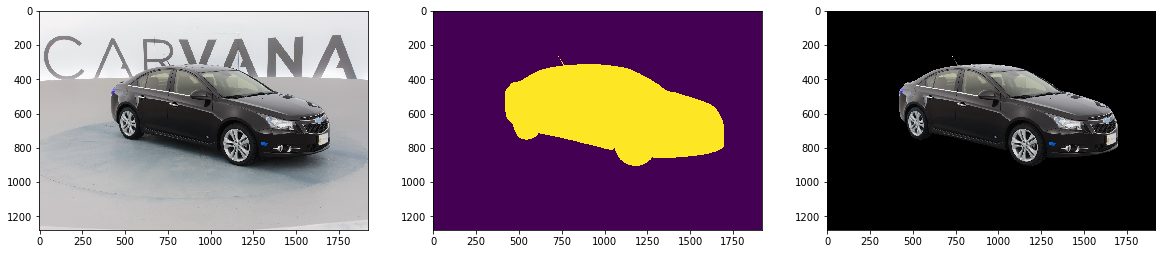

In [32]:
plot_random_img_angle(r'15$')

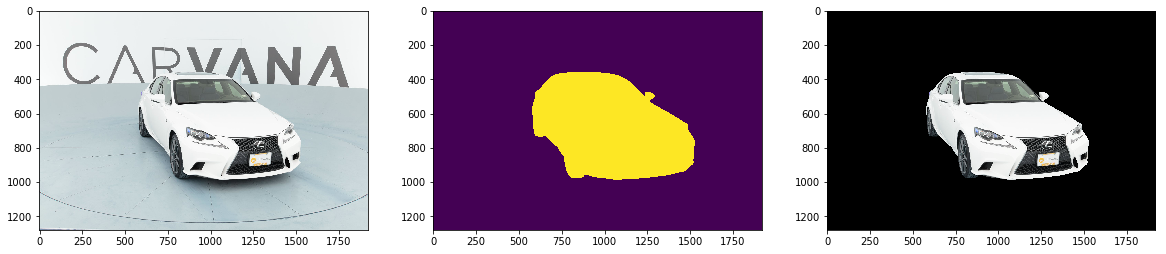

In [33]:
plot_random_img_angle(r'16$')

# Metadata analysis

In [34]:
metadata = pd.read_csv('./data/metadata.csv')

In [35]:
metadata.head()

,id,year,make,model,trim1,trim2
0,0004d4463b50,2014.0,Acura,TL,TL,w/SE
1,00087a6bd4dc,2014.0,Acura,RLX,RLX,w/Tech
2,000aa097d423,2012.0,Mazda,MAZDA6,MAZDA6,i Sport
3,000f19f6e7d4,2016.0,Chevrolet,Camaro,Camaro,SS
4,00144e887ae9,2015.0,Acura,TLX,TLX,SH-AWD V6 w/Advance Pkg


In [36]:
metadata.shape

(6572, 6)

In [39]:
metadata.make.unique()

array(['Acura', 'Mazda', 'Chevrolet', 'BMW', 'Honda', 'Buick', 'Kia',
       'Toyota', 'Hyundai', 'Nissan', 'FIAT', 'Chrysler', 'INFINITI',
       'Ford', 'Volkswagen', 'Dodge', 'Jeep', 'Cadillac', 'GMC', 'Lincoln',
       'Lexus', 'Jaguar', 'Smart', 'Infiniti', 'Mercedes-Benz',
       'Mitsubishi', 'MINI', 'Subaru', 'Audi', 'Land Rover', 'Ram',
       'Volvo', 'Scion', 'Mercury', nan, 'Porsche', 'Maserati'], dtype=object)

In [41]:
len(metadata.model.unique())

399

In [42]:
metadata.year.unique()

array([ 2014.,  2012.,  2016.,  2015.,  2013.,  2009.,  2010.,  2011.,
        2008.,    nan,  2007.,  2006.,  2017.])

In [49]:
# Some NaNs are present
print(metadata.year.isnull().sum())
print(metadata.make.isnull().sum())
print(metadata.model.isnull().sum())

11
11
11


In [53]:
metadata[metadata.year.isnull()]

,id,year,make,model,trim1,trim2
651,1bbbb18092ca,NaN,NaN,NaN,Corvette,Z16 Grand Sport
1789,4566d0394275,NaN,NaN,NaN,4Runner,Limited
2138,520b02fd768c,NaN,NaN,NaN,V60,T5 Premier
2373,5d1a742169df,NaN,NaN,NaN,Santa Fe Sport,2.4L
2400,5e2197e9a693,NaN,NaN,NaN,Soul,Base
2966,7362a3e9a140,NaN,NaN,NaN,LEAF,SL
4027,9d3fe02e9736,NaN,NaN,NaN,Genesis Coupe,3.8 Ultimate
4270,a707401e0d5e,NaN,NaN,NaN,Sonata,SE
4630,b3178ab642da,NaN,NaN,NaN,Terrain,SLE-1
5222,c9840d882da6,NaN,NaN,NaN,Terrain,SLE-2


In [55]:
# All of them are part of the test set